In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
df_index = pd.read_csv("economic_index.csv")

In [71]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [72]:
# drop unnecessary columns 

df_index.drop(columns=["year" , "month" ,"Unnamed: 0"] , axis=1 , inplace=True) 


In [73]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [74]:
# Check Null Values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

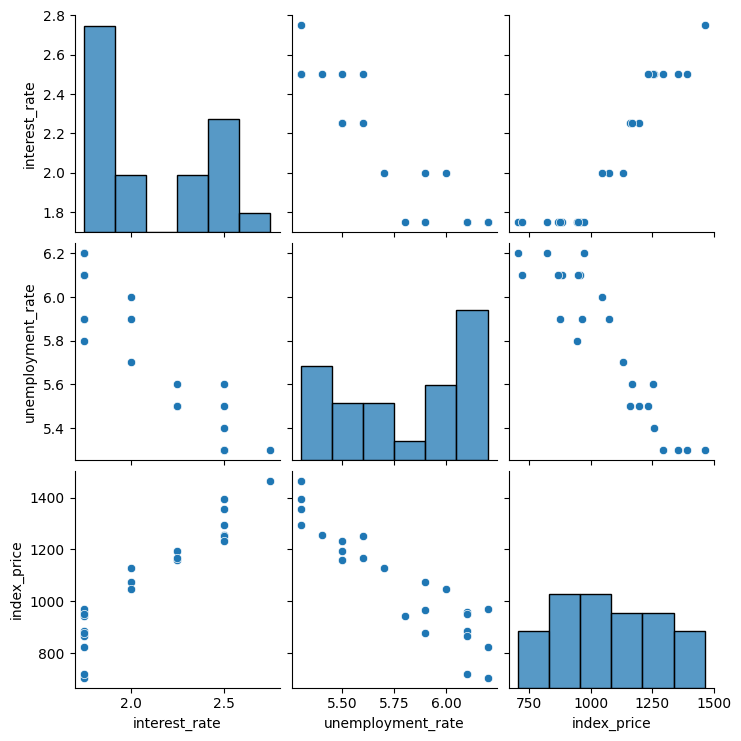

In [75]:
## Lets do some visualization 
import seaborn as sns 
sns.pairplot(df_index)

In [76]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


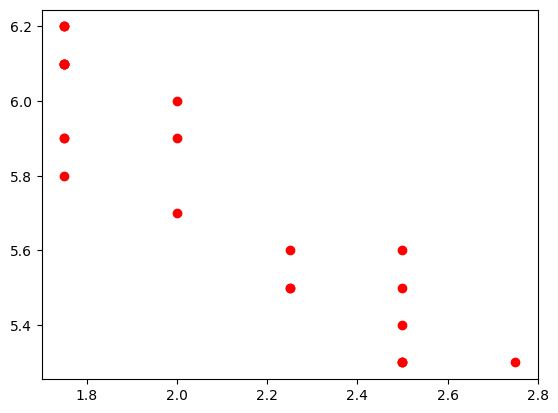

In [77]:
## visulaize the datapoints more closely

plt.scatter(df_index["interest_rate"] , df_index["unemployment_rate"] ,  color='r')

In [78]:
## get my independent and depended Feature 

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [79]:
# do train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

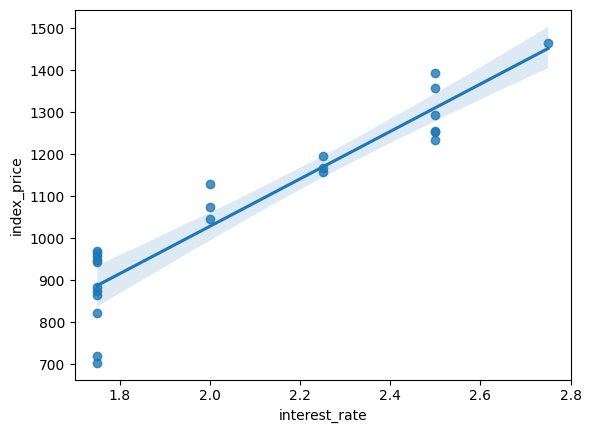

In [80]:
import seaborn as sns
sns.regplot(x = "interest_rate" ,y ="index_price" , data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

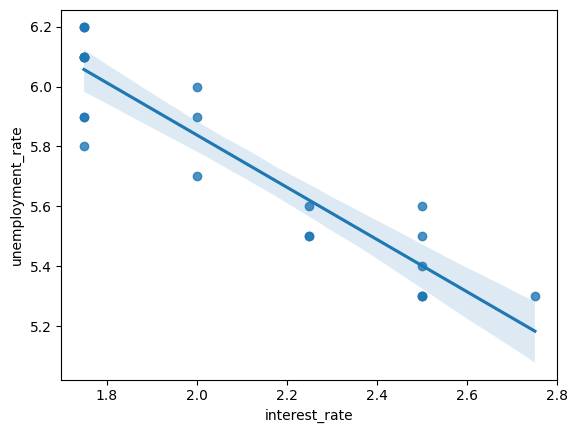

In [81]:
sns.regplot(x="interest_rate" , y="unemployment_rate" , data=df_index)

In [82]:
# Standardization 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 



In [83]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [84]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()


In [88]:
regression.fit(X_train,y_train)

LinearRegression()

In [92]:
from sklearn.model_selection import cross_val_score 

validation_score = cross_val_score(regression,X_train , y_train , scoring="neg_mean_squared_error" , cv=3)

In [93]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [94]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [95]:
y_pred = regression.predict(X_test)

In [98]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [99]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


## Assumptions 


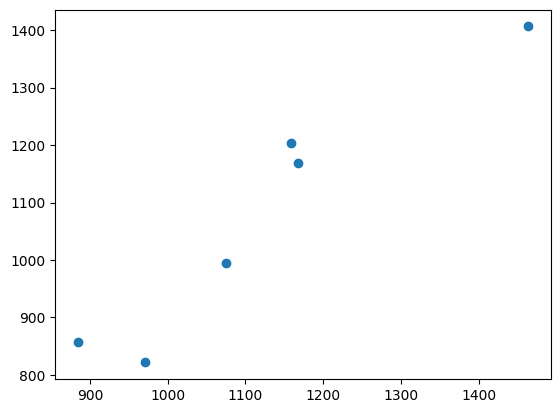

In [100]:
plt.scatter(y_test, y_pred)

In [101]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


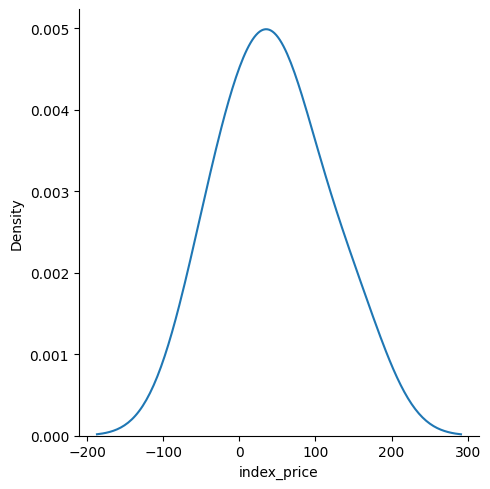

In [103]:
sns.displot(residuals , kind='kde')

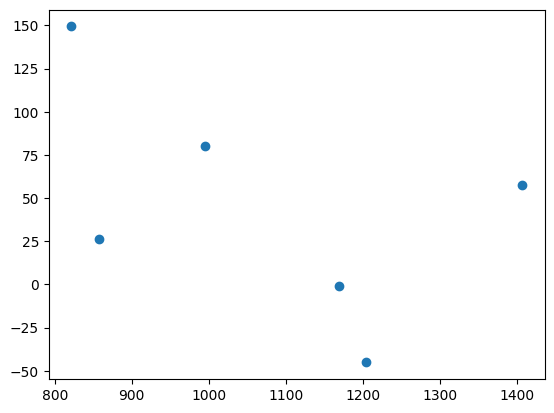

In [105]:
plt.scatter(y_pred , residuals)

In [106]:
## OLS Linear Regression 
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [107]:
model.summary()

c:\Users\HP\Desktop\Udemy_Machine_Learning\Learning\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 20 Jan 2025   Prob (F-statistic):                       0.754
Time:                        22:58:31   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
print(regression.coef_)

[  88.27275507 -116.25716066]
